<a href="https://colab.research.google.com/github/saeedgolzar/AML_Course/blob/main/Project/Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Machine Learning Project

Saeed Golzar | Summer 2022

---

Import libraries

In [1]:
import re
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import data_table
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
data_table.enable_dataframe_formatter()

# Part 1: Image Clustering

## Load Dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Randomly plot one picture in each category

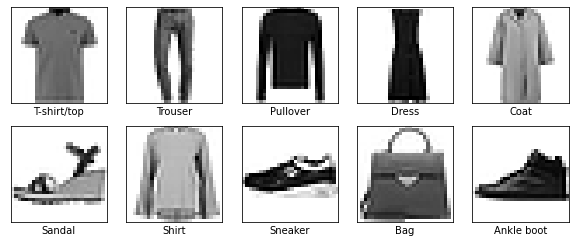

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,4))
i = int(train_labels.size * random.random())
ploted = list()
while len(ploted) < 10:
  i += 1
  if train_labels[i] in ploted:
    continue
  plt.subplot(2,5, train_labels[i]+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  ploted.append(train_labels[i])
plt.savefig("fashion_mnist_rancla.svg")

## Define Functions

In [4]:
def ann_fashion(layers):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
  for i in layers:
    model.add(tf.keras.layers.Dense(i, activation='relu'))
  model.add(tf.keras.layers.Dense(10))

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  
  history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels),
    validation_freq=1)
  return model, history

def ann_eval(model, test_images, test_labels):
  test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
  print('\nTest accuracy:', test_acc)

def ann_loss(history, figname):
  # Summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.savefig(figname)

def shift_image(X, dx):
    X = np.roll(X, dx, axis=1)
    if dx>0:
        X[:, :dx] = 0
    elif dx<0:
        X[:, dx:] = 0
    return X

## Train Model

### Model 1: Flatten, Dense(128), Dense(10)

In [5]:
model, history = ann_fashion([128])

Epoch 1/20
1875/1875 [==============================] - 11s 4ms/step - loss: 4.0628 - accuracy: 0.7044 - val_loss: 0.8078 - val_accuracy: 0.7505
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7145 - accuracy: 0.7581 - val_loss: 0.6961 - val_accuracy: 0.7542
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6231 - accuracy: 0.7796 - val_loss: 0.6133 - val_accuracy: 0.7865
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5448 - accuracy: 0.8074 - val_loss: 0.5370 - val_accuracy: 0.8086
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5144 - accuracy: 0.8209 - val_loss: 0.5673 - val_accuracy: 0.8034
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4924 - accuracy: 0.8280 - val_loss: 0.5582 - val_accuracy: 0.8061
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4881 - accuracy: 0.8315 - val_loss: 0.5253 - val_accuracy

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
ann_eval(model, test_images, test_labels)

313/313 - 1s - loss: 0.5640 - accuracy: 0.8297 - 518ms/epoch - 2ms/step

Test accuracy: 0.8296999931335449


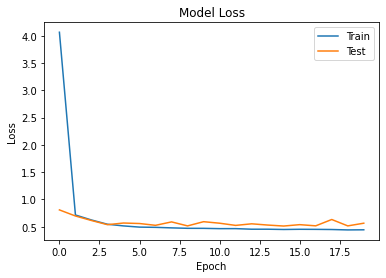

In [8]:
ann_loss(history, "plot1-1.svg")

### Model 2: Flatten, Dense(256), Dense(256), Dense(10)

In [9]:
model, history = ann_fashion([256, 256])

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1746 - accuracy: 0.7424 - val_loss: 0.6633 - val_accuracy: 0.7803
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6231 - accuracy: 0.7927 - val_loss: 0.6283 - val_accuracy: 0.7932
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5564 - accuracy: 0.8114 - val_loss: 0.5422 - val_accuracy: 0.8226
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4823 - accuracy: 0.8285 - val_loss: 0.5000 - val_accuracy: 0.8272
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4381 - accuracy: 0.8417 - val_loss: 0.4739 - val_accuracy: 0.8298
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4223 - accuracy: 0.8470 - val_loss: 0.5087 - val_accuracy: 0.8298
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4145 - accuracy: 0.8506 - val_loss: 0.4760 - val_accuracy:

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [11]:
ann_eval(model, test_images, test_labels)

313/313 - 1s - loss: 0.4866 - accuracy: 0.8506 - 549ms/epoch - 2ms/step

Test accuracy: 0.850600004196167


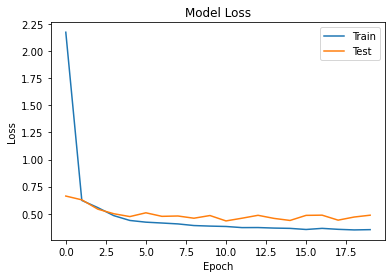

In [12]:
ann_loss(history, "plot1-2.svg")

### Model 3: Flatten, Dense(256), Dense(512), Dense(256), Dense(10)

In [13]:
model, history = ann_fashion([256, 512, 256])

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2850 - accuracy: 0.7647 - val_loss: 0.5150 - val_accuracy: 0.8241
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4617 - accuracy: 0.8356 - val_loss: 0.4602 - val_accuracy: 0.8340
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4307 - accuracy: 0.8462 - val_loss: 0.4339 - val_accuracy: 0.8443
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4132 - accuracy: 0.8537 - val_loss: 0.4594 - val_accuracy: 0.8398
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3909 - accuracy: 0.8608 - val_loss: 0.4285 - val_accuracy: 0.8529
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3801 - accuracy: 0.8647 - val_loss: 0.4282 - val_accuracy: 0.8519
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3686 - accuracy: 0.8685 - val_loss: 0.4049 - val_accuracy:

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 466,442
Trainable params: 466,442
Non-trainable params: 0
_________________________________________________________________


In [15]:
ann_eval(model, test_images, test_labels)

313/313 - 1s - loss: 0.4165 - accuracy: 0.8704 - 549ms/epoch - 2ms/step

Test accuracy: 0.8704000115394592


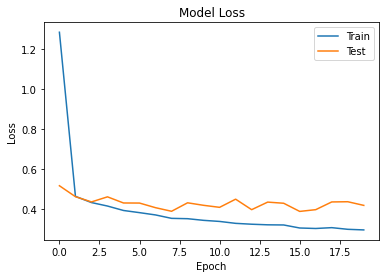

In [16]:
ann_loss(history, "plot1-3.svg")

### Model 4: Flatten, Dense(512), Dense(256), Dense(512), Dense(10)

In [17]:
model, history = ann_fashion([512, 512])

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1189 - accuracy: 0.7461 - val_loss: 0.8714 - val_accuracy: 0.7286
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6788 - accuracy: 0.7763 - val_loss: 0.5934 - val_accuracy: 0.8000
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5521 - accuracy: 0.8094 - val_loss: 0.5783 - val_accuracy: 0.8135
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4836 - accuracy: 0.8321 - val_loss: 0.5400 - val_accuracy: 0.8170
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4589 - accuracy: 0.8406 - val_loss: 0.4895 - val_accuracy: 0.8333
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4447 - accuracy: 0.8436 - val_loss: 0.4772 - val_accuracy: 0.8333
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4268 - accuracy: 0.8479 - val_loss: 0.4753 - val_accuracy:

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [19]:
ann_eval(model, test_images, test_labels)

313/313 - 1s - loss: 0.4693 - accuracy: 0.8526 - 536ms/epoch - 2ms/step

Test accuracy: 0.8525999784469604


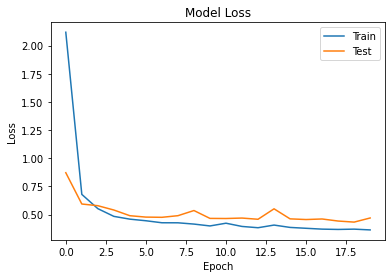

In [20]:
ann_loss(history, "plot1-4.svg")

### Model 5: Flatten, Dense(1024), Dense(10)

In [21]:
model, history = ann_fashion([1024])

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 5.2679 - accuracy: 0.7853 - val_loss: 0.5821 - val_accuracy: 0.8102
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5141 - accuracy: 0.8261 - val_loss: 0.5515 - val_accuracy: 0.8139
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5042 - accuracy: 0.8313 - val_loss: 0.6152 - val_accuracy: 0.8029
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4915 - accuracy: 0.8373 - val_loss: 0.5844 - val_accuracy: 0.8244
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4889 - accuracy: 0.8389 - val_loss: 0.5186 - val_accuracy: 0.8323
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4729 - accuracy: 0.8439 - val_loss: 0.5897 - val_accuracy: 0.8233
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4563 - accuracy: 0.8460 - val_loss: 0.5478 - val_accuracy:

In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 1024)              803840    
                                                                 
 dense_13 (Dense)            (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [23]:
ann_eval(model, test_images, test_labels)

313/313 - 1s - loss: 0.5414 - accuracy: 0.8359 - 503ms/epoch - 2ms/step

Test accuracy: 0.8359000086784363


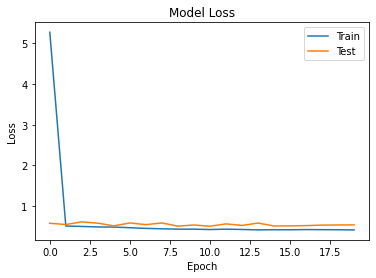

In [24]:
ann_loss(history, "plot1-5.svg")

### Model 6: Flatten, Dense(1024), Dense(512), Dense(1024), Dense(10)

In [25]:
model, history = ann_fashion([1024, 512, 1024])

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5409 - accuracy: 0.7186 - val_loss: 0.6719 - val_accuracy: 0.7698
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6171 - accuracy: 0.7883 - val_loss: 0.6268 - val_accuracy: 0.7686
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5128 - accuracy: 0.8208 - val_loss: 0.5409 - val_accuracy: 0.8102
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4600 - accuracy: 0.8349 - val_loss: 0.4409 - val_accuracy: 0.8408
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4366 - accuracy: 0.8472 - val_loss: 0.4980 - val_accuracy: 0.8278
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4017 - accuracy: 0.8570 - val_loss: 0.5386 - val_accuracy: 0.8424
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3893 - accuracy: 0.8598 - val_loss: 0.4596 - val_accuracy:

In [26]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 1024)              803840    
                                                                 
 dense_15 (Dense)            (None, 512)               524800    
                                                                 
 dense_16 (Dense)            (None, 1024)              525312    
                                                                 
 dense_17 (Dense)            (None, 10)                10250     
                                                                 
Total params: 1,864,202
Trainable params: 1,864,202
Non-trainable params: 0
_________________________________________________________________


In [27]:
ann_eval(model, test_images, test_labels)

313/313 - 1s - loss: 0.4018 - accuracy: 0.8718 - 549ms/epoch - 2ms/step

Test accuracy: 0.8718000054359436


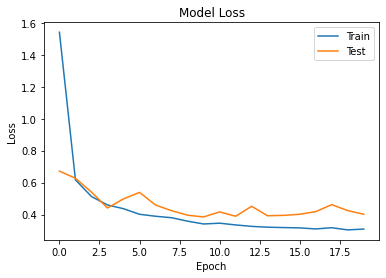

In [28]:
ann_loss(history, "plot1-6.svg")

### Model 7: Flatten, Dense(1024), Dense(1024), Dense(1024), Dense(10)

In [36]:
model, history = ann_fashion([1024, 1024, 1024])

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 1.8093 - accuracy: 0.7888 - val_loss: 0.5391 - val_accuracy: 0.8208
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4503 - accuracy: 0.8404 - val_loss: 0.4764 - val_accuracy: 0.8370
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4176 - accuracy: 0.8505 - val_loss: 0.5057 - val_accuracy: 0.8397
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4013 - accuracy: 0.8579 - val_loss: 0.5703 - val_accuracy: 0.8142
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3812 - accuracy: 0.8658 - val_loss: 0.4653 - val_accuracy: 0.8400
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3699 - accuracy: 0.8699 - val_loss: 0.3879 - val_accuracy: 0.8611
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3547 - accuracy: 0.8735 - val_loss: 0.4112 - val_accuracy

In [37]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 1024)              803840    
                                                                 
 dense_23 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_24 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_25 (Dense)            (None, 10)                10250     
                                                                 
Total params: 2,913,290
Trainable params: 2,913,290
Non-trainable params: 0
_________________________________________________________________


In [38]:
ann_eval(model, test_images, test_labels)

313/313 - 1s - loss: 0.4071 - accuracy: 0.8708 - 565ms/epoch - 2ms/step

Test accuracy: 0.8708000183105469


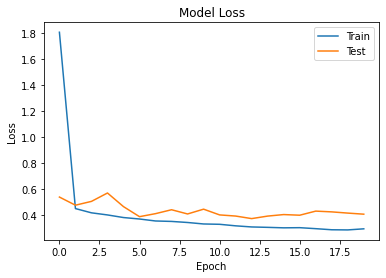

In [39]:
ann_loss(history, "plot1-7.svg")

## Shift images and train model

In [40]:
test_images_shifted = np.roll(test_images, 4, axis=1)

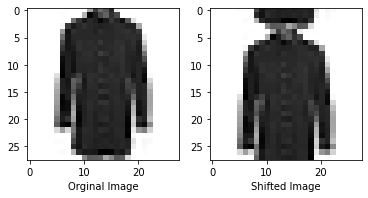

In [41]:
#@title Show Orginal and shifted image
Image_number = 444 #@param {type:"integer"}

plt.subplot(1, 2, 1)
plt.imshow(test_images[Image_number], cmap=plt.cm.binary)
plt.xlabel('Orginal Image')
plt.subplot(1, 2, 2)
plt.imshow(test_images_shifted[Image_number], cmap=plt.cm.binary)
plt.xlabel('Shifted Image')
plt.savefig("oi.svg")

In [42]:
ann_eval(model, test_images_shifted, test_labels)

313/313 - 1s - loss: 3.9137 - accuracy: 0.5508 - 585ms/epoch - 2ms/step

Test accuracy: 0.5508000254631042
